# Baseball Salary Prediction with Machine Learning
Develop a machine learning model to predict the salaries of baseball players whose career statistics from 1986 and salary information have been shared. <br>
**About Dataset:** <br>
This dataset was originally obtained from the StatLib library at Carnegie Mellon University. The dataset is a subset of the data used in the 1988 ASA Graphics Section Poster Session. The salary data was originally obtained from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from the 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York. <br>
**Dataset:** <br>
* AtBat: Number of times at bat during the 1986-1987 season
* Hits: Number of hits during the 1986-1987 season
* HmRun: Number of home runs during the 1986-1987 season
* Runs: Number of runs scored by the player's team during the 1986-1987 season
* RBI: Number of runs batted in by the player during the 1986-1987 season
* Walks: Number of walks by the player during the 1986-1987 season
* Years: Number of years the player has played in the major league
* CAtBat: Number of times at bat during the player's career
* CHits: Number of hits during the player's career
* CHmRun: Number of home runs during the player's career
* CRuns: Number of runs scored by the player's team during the player's career
* CRBI: Number of runs batted in by the player during the player's career
* CWalks: Number of walks by the player during the player's career
* League: Factor with levels A and N indicating the player's league at the end of the season
* Division: Factor with levels E and W indicating the player's division at the end of the 1986 season
* PutOuts: Number of put outs during the season
* Assists: Number of assists during the 1986-1987 season
* Errors: Number of errors during the 1986-1987 season
* Salary: Player's salary for the 1986-1987 season in thousands of dollars
* NewLeague: Factor with levels A and N indicating the player's league at the beginning of the 1987 season

## Configuration / Building Spark

In [1]:
from pyspark.sql import SparkSession, functions as F
import findspark

findspark.init("C:\Program Files\Spark\spark-3.3.1-bin-hadoop3")

spark = SparkSession.builder \
    .appName("House Price Model") \
    .master("local[4]") \
    .config("spark.sql.shuffle.partitions", "5") \
    .config("spark.sql.adaptive.enabled", True) \
    .getOrCreate()

## Load Data

In [3]:
path = "file:///Users/talha/OneDrive/Masaüstü/Talha Nebi Kumru/Data Science/Miuul/Machine Learning/Baseball_Salary_Prediction_with_ML/datasets/hitters.csv"
df = spark.read \
    .format("csv") \
    .option("inferSchema", True) \
    .option("header", True) \
    .load(path)

In [4]:
df.limit(5).toPandas()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


## EDA Operations

In [6]:
from _utils._eda_utils import *

In [7]:
numeric_columns, categoric_columns = seperate_columns(df.dtypes)

2023-04-17 02:35:44,775 - logging_utils - DEBUG - seperate_columns function executing...
2023-04-17 02:35:44,778 - logging_utils - INFO - 
Numerical Columns: ['Walks', 'Errors', 'CRBI', 'PutOuts', 'CRuns', 'CHmRun', 'CHits', 'CAtBat', 'Assists', 'RBI', 'HmRun', 'CWalks', 'Hits', 'Years', 'Runs', 'AtBat']
2023-04-17 02:35:44,778 - logging_utils - INFO - 
Categorical Columns: ['League', 'Division', 'Salary', 'NewLeague']


### Numerical Columns

2023-04-17 02:36:58,786 - logging_utils - DEBUG - describe_numerical_columns function is executing...
2023-04-17 02:36:58,975 - logging_utils - DEBUG - describe_numeric executing...


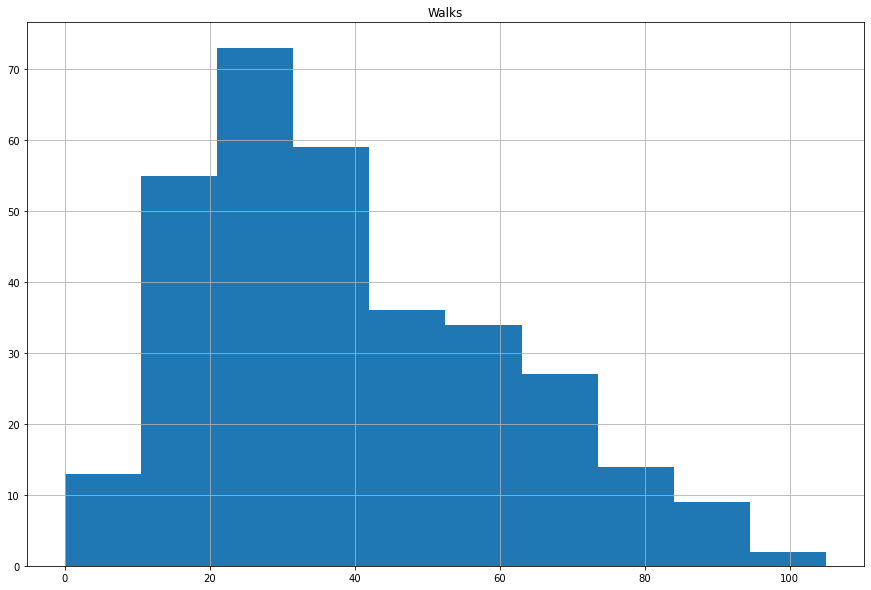

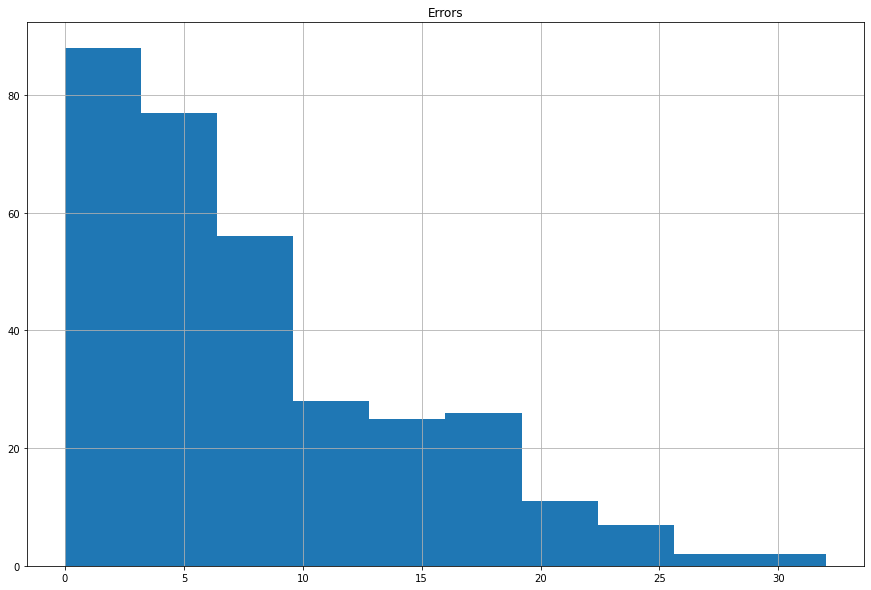

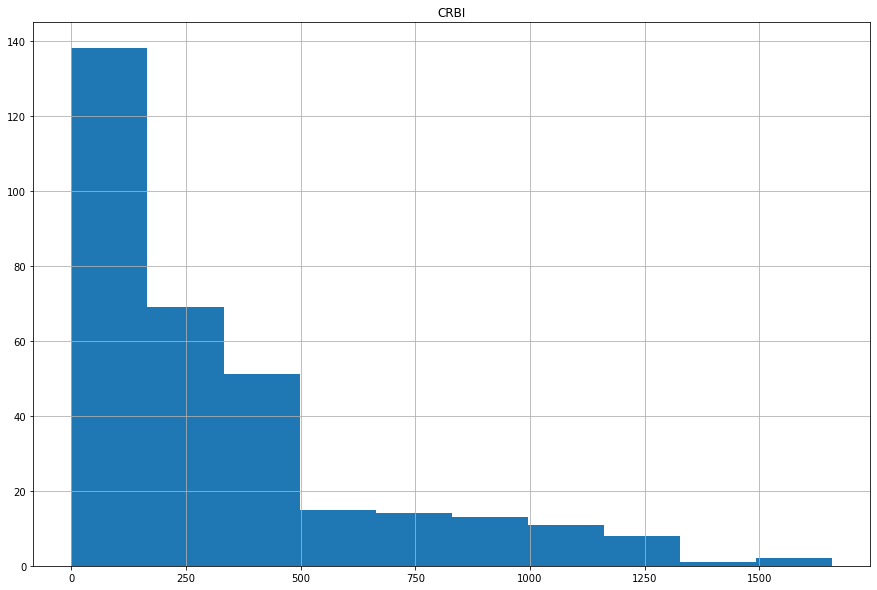

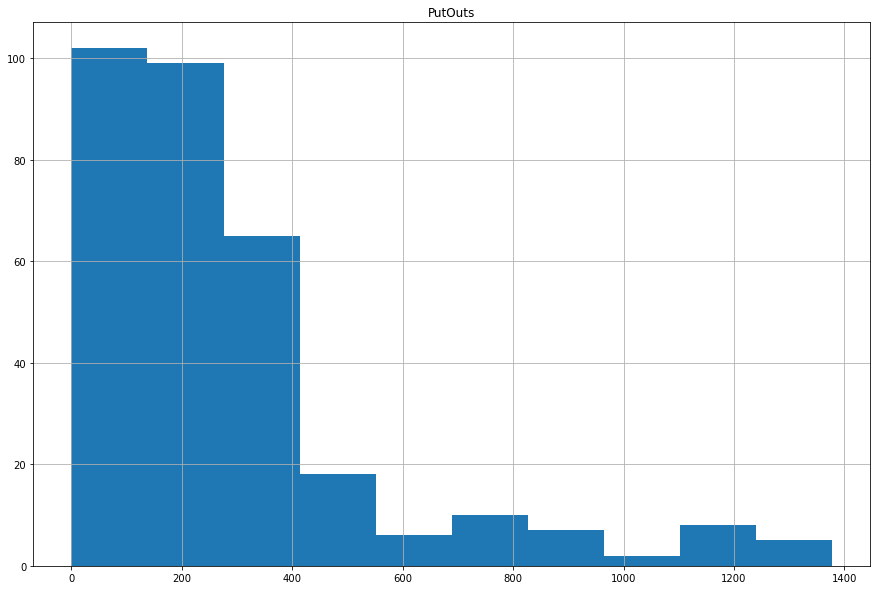

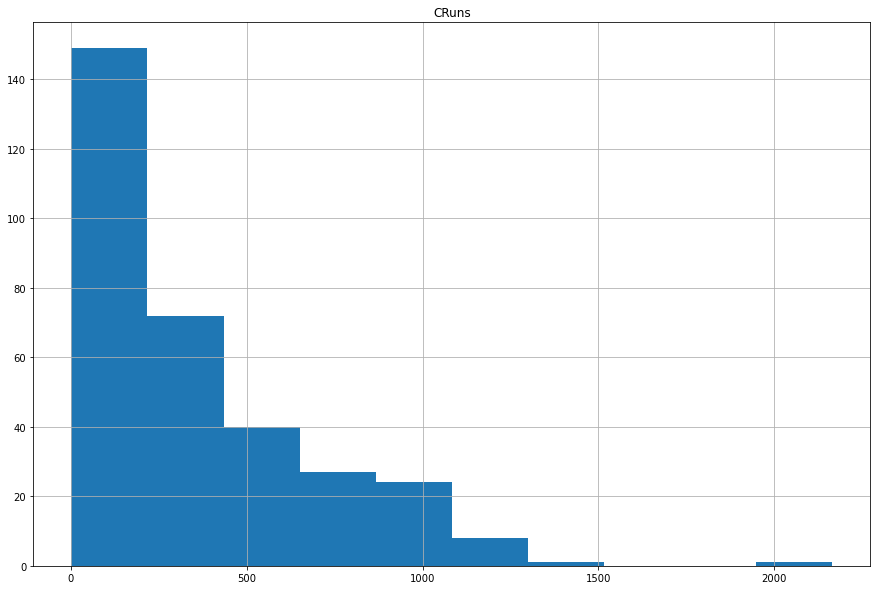

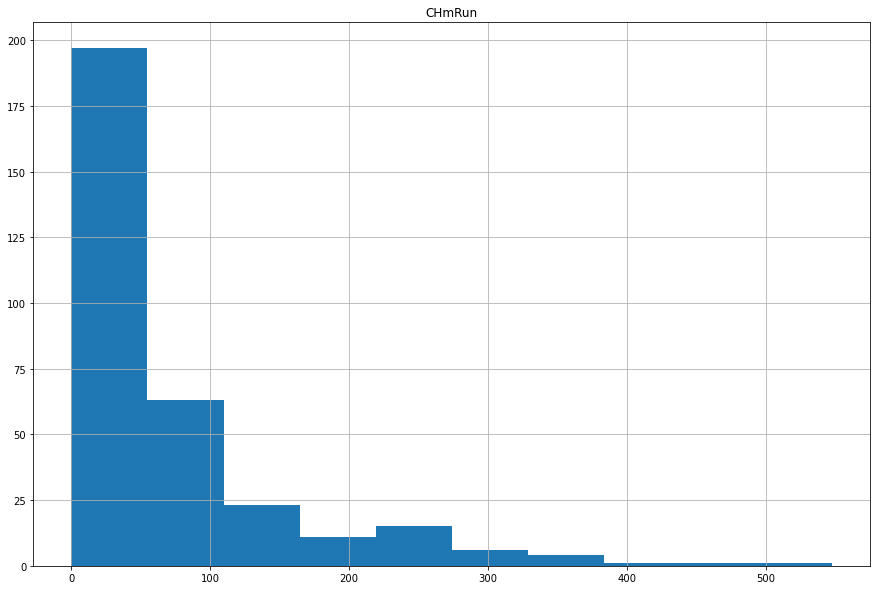

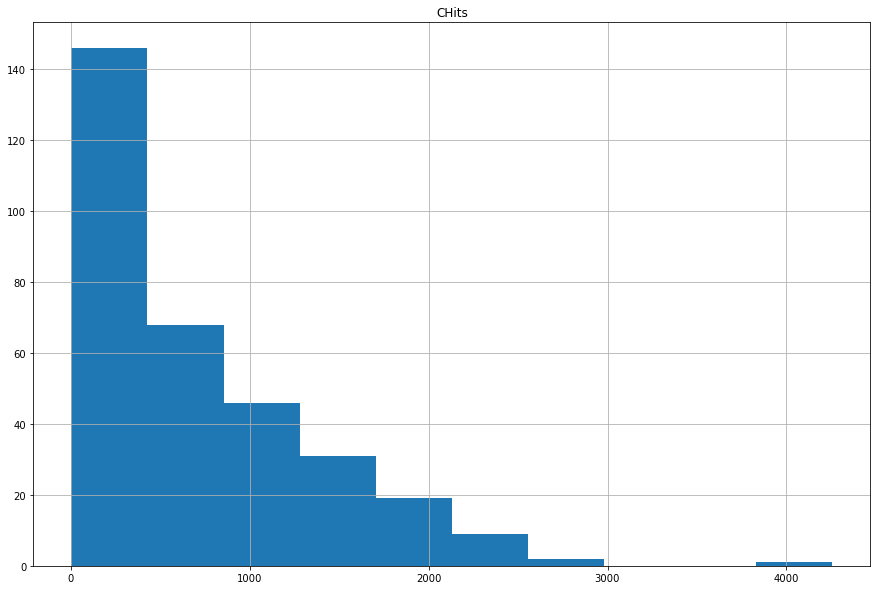

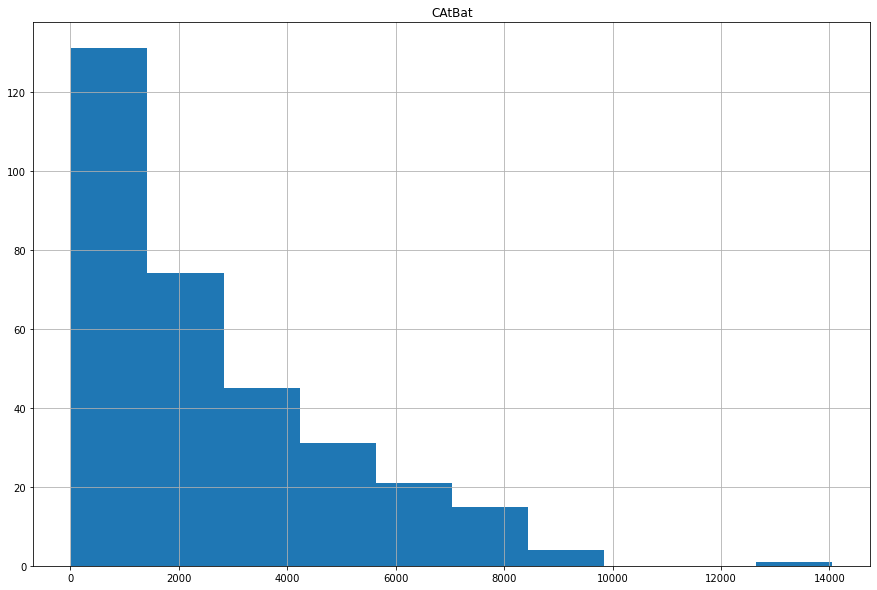

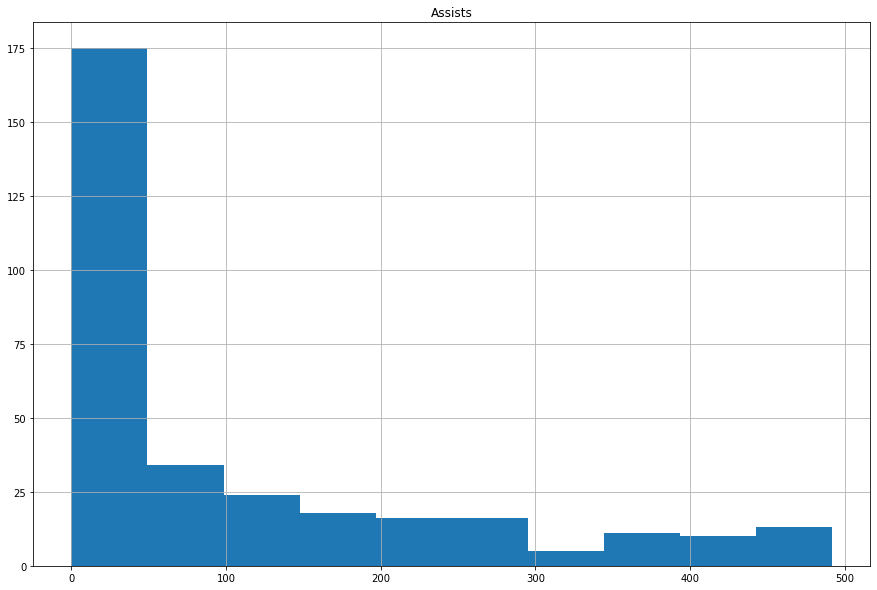

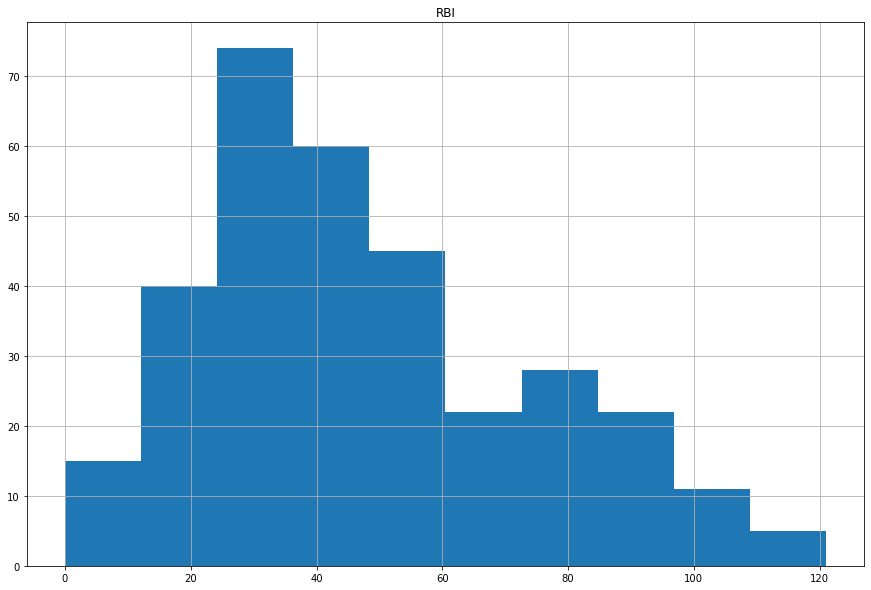

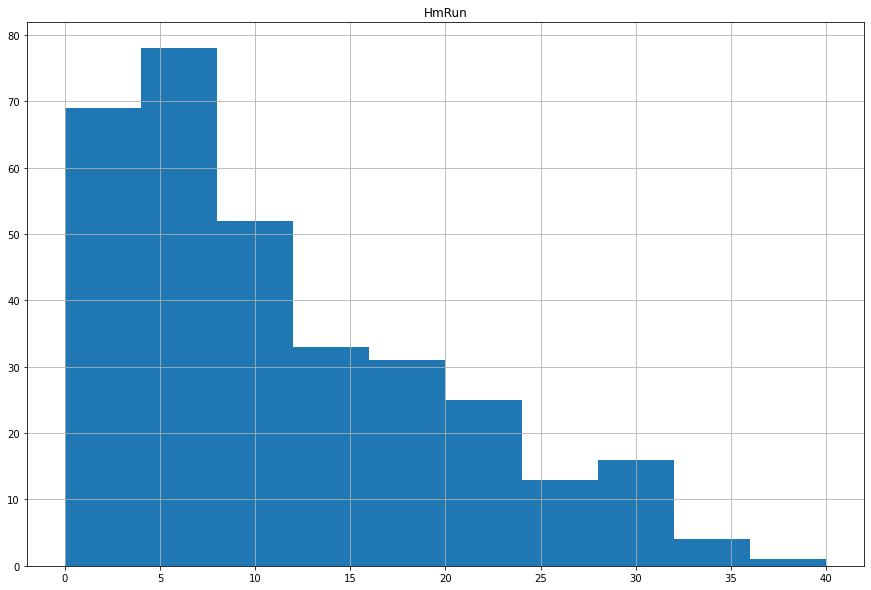

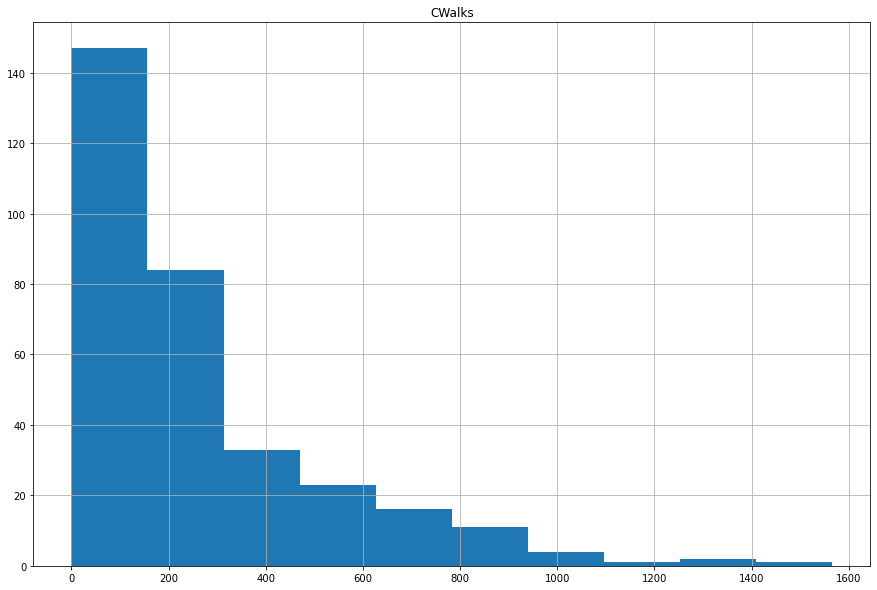

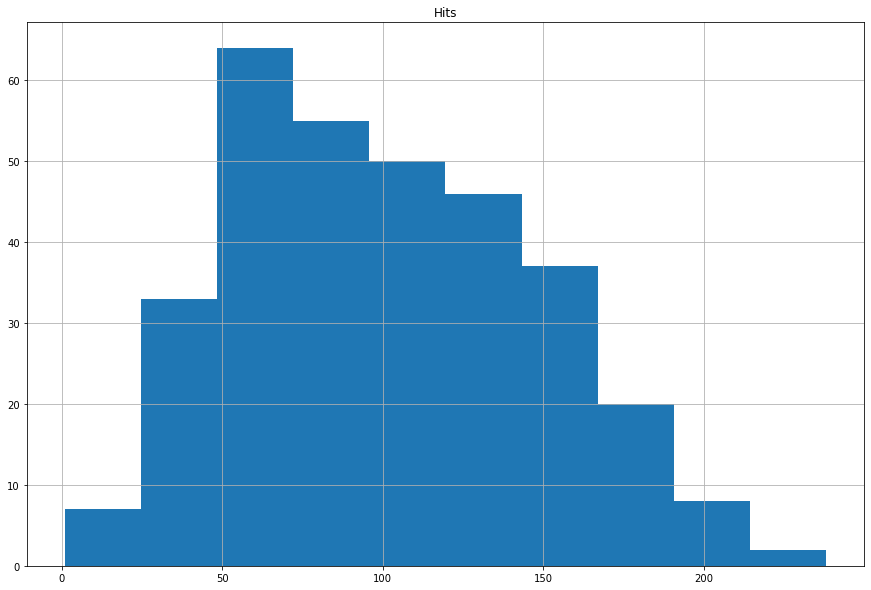

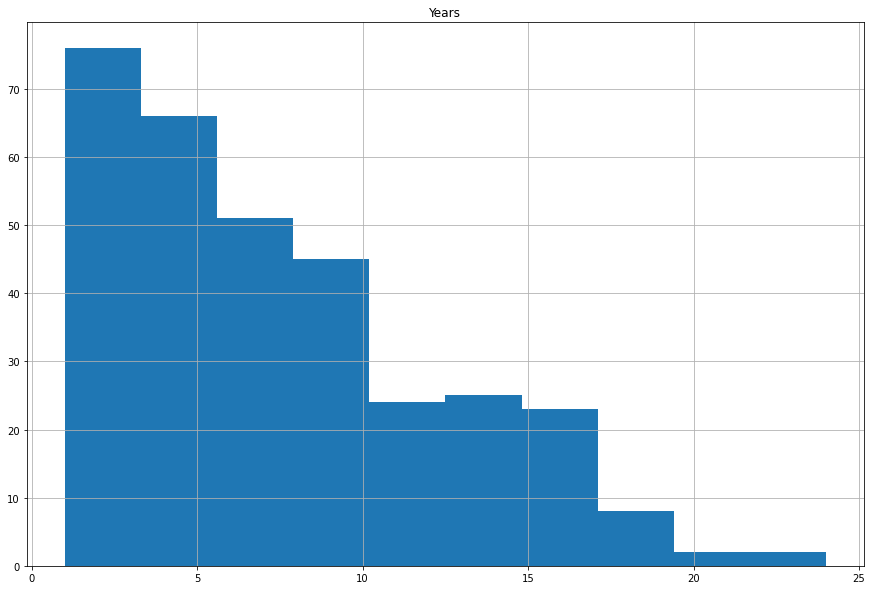

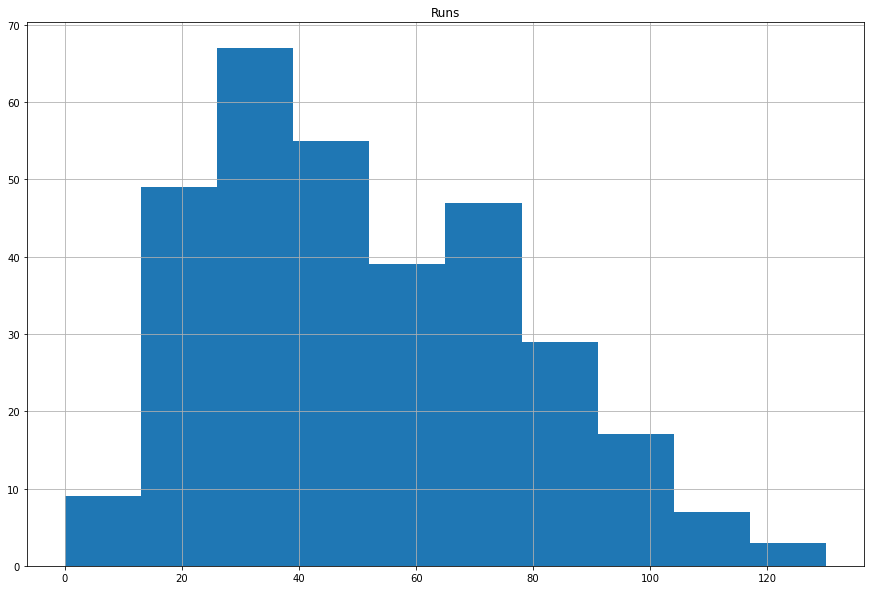

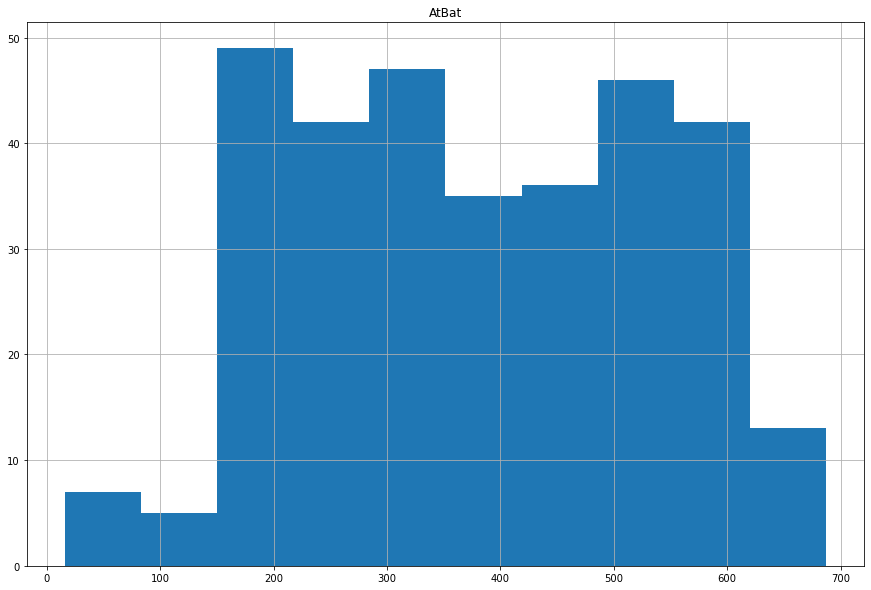

,count,mean,std,min,25%,50%,75%,max
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Errors,322.0,8.040373,6.368359,0.0,3.00,6.0,11.00,32.0
CRBI,322.0,330.118012,333.219617,0.0,88.75,220.5,426.25,1659.0
PutOuts,322.0,288.937888,280.704614,0.0,109.25,212.0,325.00,1378.0
CRuns,322.0,358.795031,334.105886,1.0,100.25,247.0,526.25,2165.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
Assists,322.0,106.913043,136.854876,0.0,7.00,39.5,166.00,492.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0


In [8]:
describe_numerical_columns(df.select(numeric_columns), 1)

### Categorical Columns

2023-04-17 02:39:28,631 - logging_utils - DEBUG - describe_categoric_columns function is executing...
2023-04-17 02:39:28,632 - logging_utils - INFO - ['League']
2023-04-17 02:39:28,722 - logging_utils - DEBUG - describe_categoric executing...
2023-04-17 02:39:28,726 - logging_utils - INFO - 
A    175
N    147
Name: League, dtype: int64


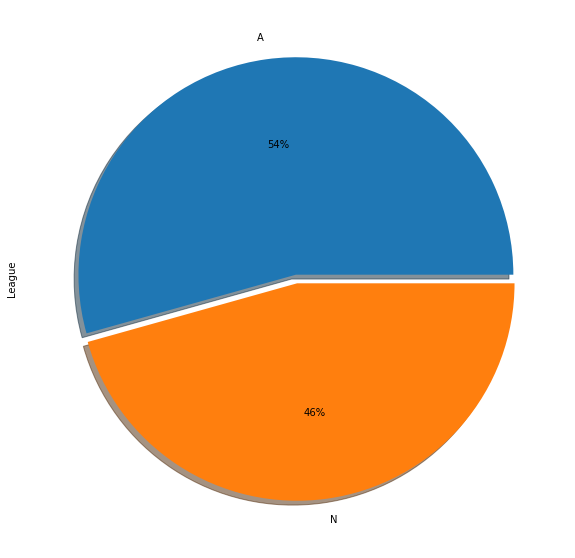

2023-04-17 02:39:28,842 - logging_utils - INFO - ['Division']
2023-04-17 02:39:28,939 - logging_utils - DEBUG - describe_categoric executing...
2023-04-17 02:39:28,942 - logging_utils - INFO - 
W    165
E    157
Name: Division, dtype: int64


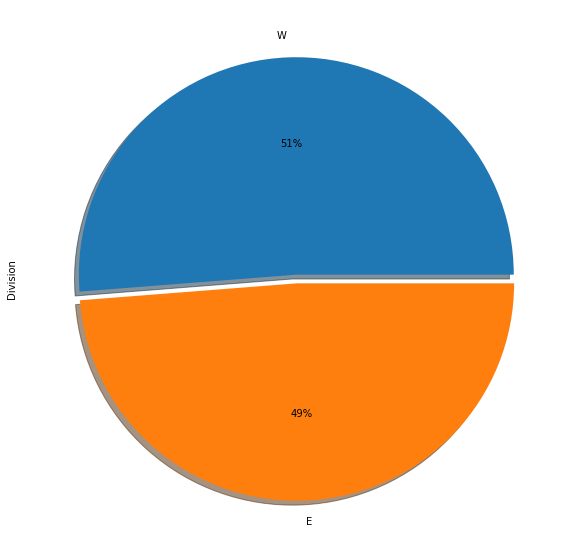

2023-04-17 02:39:29,072 - logging_utils - INFO - ['Salary']
2023-04-17 02:39:29,170 - logging_utils - DEBUG - describe_categoric executing...
2023-04-17 02:39:29,173 - logging_utils - INFO - 
NA        59
750        8
250        6
90         6
100        6
          ..
1237.5     1
87.5       1
297.5      1
662.5      1
960        1
Name: Salary, Length: 151, dtype: int64


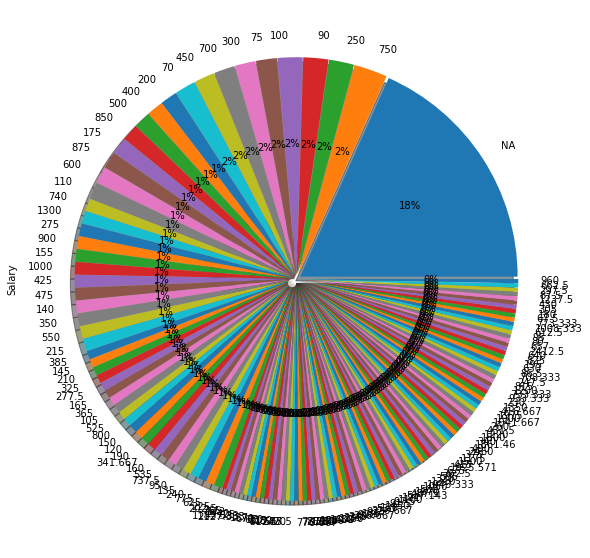

2023-04-17 02:39:30,983 - logging_utils - INFO - ['NewLeague']
2023-04-17 02:39:31,062 - logging_utils - DEBUG - describe_categoric executing...
2023-04-17 02:39:31,064 - logging_utils - INFO - 
A    176
N    146
Name: NewLeague, dtype: int64


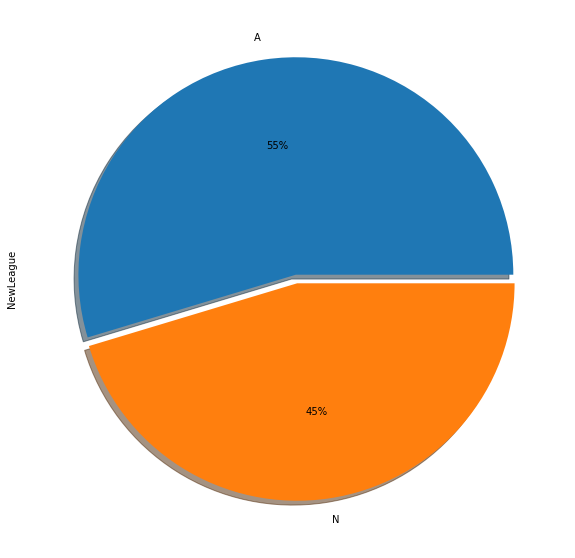

In [9]:
describe_categoric_columns(df.select(categoric_columns))

As we seen the above, *Salary* is not categorical column. It is actual **target** feature.

In [12]:
df = df.withColumn('Salary', F.col('Salary').cast('int'))

2023-04-17 02:43:15,763 - logging_utils - DEBUG - describe_numerical_columns function is executing...
2023-04-17 02:43:15,827 - logging_utils - DEBUG - describe_numeric executing...


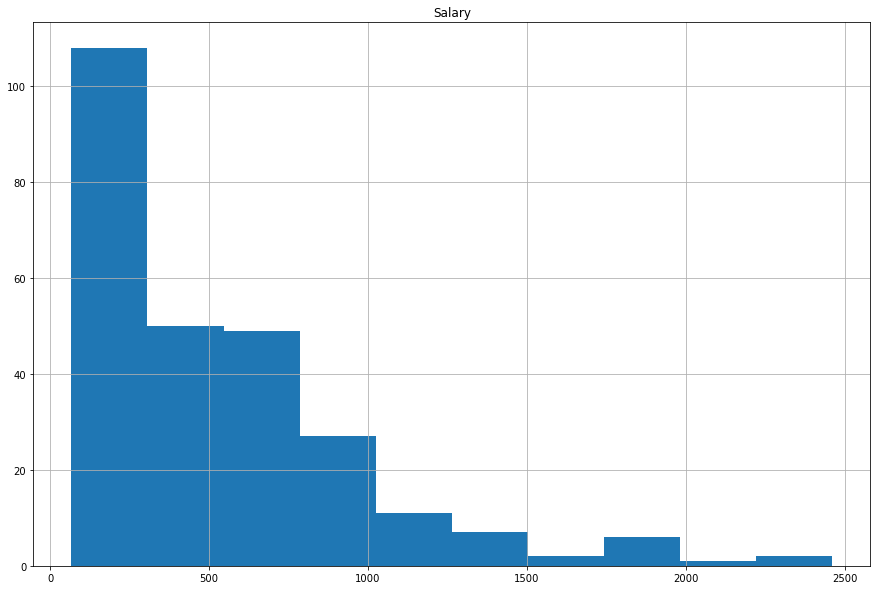

,count,mean,std,min,25%,50%,75%,max
Salary,263.0,535.851711,451.098275,67.0,190.0,425.0,750.0,2460.0


In [14]:
describe_numerical_columns(df.select('Salary'), 1)

In [16]:
categoric_columns = [col for col in categoric_columns if col != 'Salary']

### Describe Features for Target

In [17]:
describe_columns_to_target(df, columns=categoric_columns, target='Salary')

2023-04-17 02:45:10,390 - logging_utils - DEBUG - describe_columns_to_target executing...
+------+-----------------+------+------------------+
|League|Mean             |Median|Std               |
+------+-----------------+------+------------------+
|N     |529.0322580645161|450   |437.04811618576554|
|A     |541.9352517985611|400   |464.7659409157068 |
+------+-----------------+------+------------------+

+--------+------------------+------+------------------+
|Division|Mean              |Median|Std               |
+--------+------------------+------+------------------+
|W       |450.82089552238807|365   |343.08079783894715|
|E       |624.1782945736434 |517   |527.9999326706337 |
+--------+------------------+------+------------------+

+---------+-----------------+------+------------------+
|NewLeague|Mean             |Median|Std               |
+---------+-----------------+------+------------------+
|N        |534.4672131147541|450   |442.4683428826588 |
|A        |537.049645390071 |4

### Checking Missing Values

In [18]:
check_missing_values(df)

2023-04-17 02:47:37,215 - logging_utils - DEBUG - check_missing_values executing...
2023-04-17 02:47:40,284 - logging_utils - INFO - Salary has 59 -  18.32 % null count.


*Salary* is the target column therefore, it is important to not handle this column. It can be remove missing values on target column. 

In [19]:
from _utils._missing_utils import remove_missing_values

In [22]:
df = remove_missing_values(df, ['Salary'])

In [23]:
check_missing_values(df)

2023-04-17 02:51:11,653 - logging_utils - DEBUG - check_missing_values executing...


### Checking Outliers

In [24]:
check_outlier_values(df, numeric_columns)

2023-04-17 02:51:47,923 - logging_utils - DEBUG - check_outlier_values executing...


{}

## Save Final Data

In [25]:
path = "file:///Users/talha/OneDrive/Masaüstü/Talha Nebi Kumru/Data Science/Miuul/Machine Learning/Baseball_Salary_Prediction_with_ML/datasets/processed.parquet"
df.write.parquet(path)

In [26]:
spark.stop()